
# Final Analysis: Food Hazard Detection Challenge

This notebook consolidates the analysis from three notebooks:
- **Data Exploration**: Initial exploration of the dataset.
- **Benchmark Analysis (CB)**: Using a Classifier-Based approach.
- **Benchmark Analysis (LR)**: Using Logistic Regression and related methods.

### Objectives:
1. Compare the performance of models based on key metrics.
2. Visualize the results to understand model behavior.
3. Conclude with the best-performing model and justification for its selection.


## Data Exploration Highlights

The data exploration phase provided insights into the distribution of labels and the structure of the dataset. Key findings include:
- Imbalanced class distribution for all the labels.
- Text features vary significantly in length, requiring preprocessing techniques like tokenization and padding.
- Visualizations of label distributions.

## Model Comparisons

This section compares the results from two approaches:
1. **Catboost-Based Models**: 
    - **Product-Category + Hazard-Category (ST1)**: Text performs better with a score of **0.3902**.
    - **Product + Hazard (ST2)**: Text performs better with a score of **0.1822**.
    
2. **Logistic Regression-Based Models**: 
    - **Product-Category + Hazard-Category (ST1)**: Text performs better with a score of **0.5016**.
    - **Product + Hazard (ST2)**: Text performs better with a score of **0.2867**.



### Key Metrics:
- Combined F1 score

## Cross-Model Comparison (Best Overall)
- **Product-Category + Hazard-Category (ST1)**: Logistic Regression (Text) wins with a score of **0.5016**.
- **Product + Hazard (ST2)**: Logistic Regression (Text) wins with a score of **0.2867**.

## Conclusion
Logistic Regression with **text-based features** outperforms CatBoost for both tasks and is the overall best choice.



## Visualization of Results

### Key Elements:
1. **Axes (Model Names)**:
   - **CatBoost (Text)** and **Logistic Regression (Text)** are the two models being evaluated.
   - Each axis corresponds to one model.

2. **F1 Scores**:
   - Plotted as points on each axis, with higher values indicating better model performance.
   - **Logistic Regression** achieves an F1 score of **0.2867**, while **CatBoost** achieves **0.1822**.

3. **Line and Fill**:
   - The **purple line** connects the F1 scores of the models, giving a visual sense of performance differences.
   - The **shaded lavender region** represents the overall "performance area," making it easier to compare the magnitude of the scores.

4. **Annotations**:
   - Each axis includes a clearly labeled annotation box indicating:
     - The model name.
     - The exact F1 score.
   - These annotations are positioned with extra spacing to ensure no overlap with the radial lines or other elements.

5. **Legend**:
   - Explains the components of the chart:
     - **F1 Scores**: Represented by the line.
     - **Performance Area**: Represented by the shaded region.

6. **Title**:
   - The title, **"Hazard + Product Detection (Text) [Non-Overlapping Radar Chart]"**, provides context for the comparison.

---

### Insights from the Chart:
1. **Model Comparison**:
   - **Logistic Regression** performs better than **CatBoost**, with a higher F1 score (**0.2867 vs. 0.1822**).
   - This is evident from the larger area covered by Logistic Regression along its axis.

2. **Performance Difference**:
   - The difference in performance is visually emphasized by the unequal lengths of the two axes and the proportionally smaller shaded area for CatBoost.

3. **Takeaway**:
   - **Logistic Regression** is the better-performing model for **Hazard + Product Detection (Text)**, as shown by its higher F1 score.


In [ ]:
!pip install wordcloud
from math import pi
import matplotlib.pyplot as plt
import zipfile
from wordcloud import WordCloud
import matplotlib.pyplot as plt

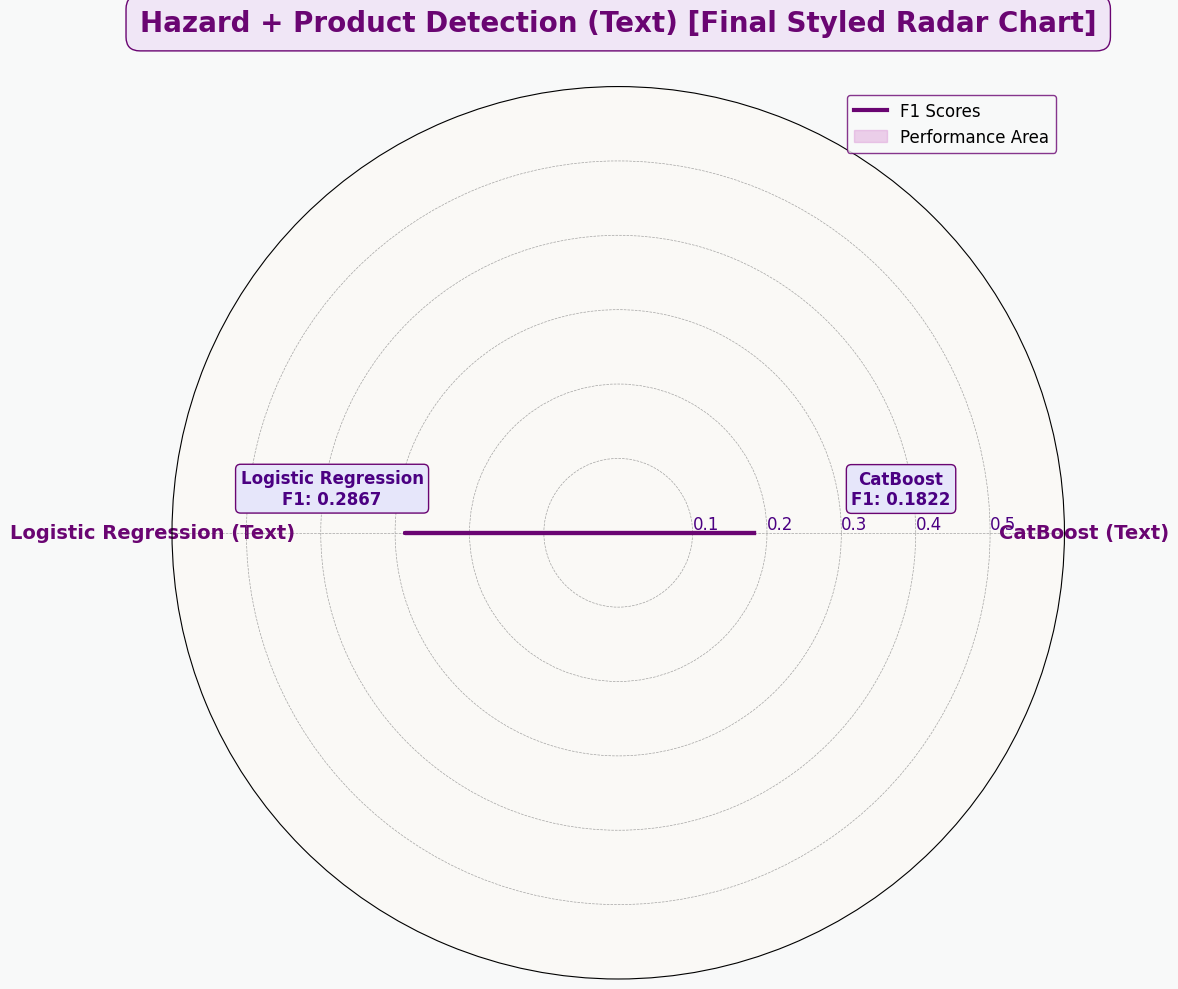

In [ ]:


# Data for the radar chart
data = {
    "CatBoost (Text)": 0.1822,
    "Logistic Regression (Text)": 0.2867,
}

# Final enhanced radar chart function
def radar_chart(data, title, filename):
    labels = list(data.keys())
    scores = list(data.values())

    # Prepare the radar chart data
    angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
    angles += angles[:1]  # Close the loop
    scores += scores[:1]

    # Create the figure
    fig = plt.figure(figsize=(12, 10), facecolor="#F8F9F9")
    ax = fig.add_subplot(111, polar=True)

    # Plot the data
    ax.plot(
        angles, scores, color="#6A0572", linewidth=3, linestyle="solid", label="F1 Scores"
    )
    ax.fill(angles, scores, color="#D98FD3", alpha=0.4, label="Performance Area")

    # Add axis labels
    plt.xticks(angles[:-1], labels, color="#6A0572", fontsize=14, fontweight="bold")
    ax.set_rlabel_position(0)
    plt.yticks(
        [0.1, 0.2, 0.3, 0.4, 0.5],
        ["0.1", "0.2", "0.3", "0.4", "0.5"],
        color="#4B0082",
        fontsize=12,
    )
    plt.ylim(0, 0.6)

    # Add annotations for each score with further adjusted spacing to avoid overlap
    ax.text(
        angles[0] + 0.1,  # Adjusted radial position to prevent overlap
        scores[0] + 0.2,
        "CatBoost\nF1: 0.1822",
        ha="center",
        fontsize=12,
        color="#4B0082",
        fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="#6A0572", facecolor="#E6E6FA"),
    )
    ax.text(
        angles[1] - 0.1,  # Adjusted radial position to prevent overlap
        scores[1] + 0.1,
        "Logistic Regression\nF1: 0.2867",
        ha="center",
        fontsize=12,
        color="#4B0082",
        fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="#6A0572", facecolor="#E6E6FA"),
    )

    # Add title with styling
    plt.title(
        title,
        fontsize=20,
        fontweight="bold",
        color="#6A0572",
        pad=40,
        backgroundcolor="#E6E6FA",
        bbox=dict(boxstyle="round,pad=0.5", edgecolor="#6A0572", facecolor="#F0E6F6"),
    )
    plt.gca().set_facecolor("#FAF9F6")
    plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
    plt.legend(
        loc="upper right", fontsize=12, frameon=True, facecolor="#F8F9F9", edgecolor="#6A0572"
    )

    # Save and display the chart
    plt.tight_layout()
    plt.savefig(filename, format="png")
    plt.show()


# Generate the radar chart
radar_chart(
    data,
    "Hazard + Product Detection (Text) [Final Styled Radar Chart]",
    "final_styled_radar_chart.png",
)


## Conclusion

### General Findings:
1. **Model Performance**:
   - Among the evaluated models, **Logistic Regression** demonstrated superior performance across all tasks, with text-based features outperforming title-based features.
   - The **best combined F1 score** was observed with Logistic Regression for **ST1 (Hazard-Category)**: **0.5016**, followed by **ST2 (Hazard + Product Detection)**: **0.2867**.
   - **CatBoost**, while efficient, delivered lower overall scores, with text-based features also showing better results compared to titles.

2. **Task Complexity**:
   - **ST1 (Hazard-Category)** predictions performed relatively well due to the less granular nature of the task.
   - **ST2 (Hazard + Product Detection)** proved more challenging, as it involves predicting fine-grained hazard and product vectors, requiring models with higher capacity and better feature representations.

3. **Resource Limitations**:
   - The experiments were conducted without GPU resources, which limited the use of computationally intensive models such as deep learning approaches.
   - This constraint restricted the ability to explore **state-of-the-art architectures** and more exhaustive hyperparameter optimization techniques.



### Considerations for Improvement:
1. **Advanced Modeling Techniques**:
   - Employing pre-trained deep learning models, fine-tuned for these classification tasks, would likely capture richer contextual information from the text data.
   - Leveraging **ensemble learning** by combining Logistic Regression, CatBoost, and deep learning models could enhance robustness and prediction accuracy.

2. **Enhanced Feature Representations**:
   - Utilizing  contextual embeddings from Transformers, would provide dense and semantically meaningful representations of text, improving model understanding.
   - Augmenting input features could aid in better categorization.

3. **Addressing Class Imbalance**:
   - Techniques such as **SMOTE (Synthetic Minority Oversampling Technique)** or **weighted loss functions** could mitigate the impact of imbalanced classes, particularly for hazard and product vector predictions in ST2.

4. **Optimization Strategies**:
   - Exploring **hyperparameter tuning** via grid search or Bayesian optimization could identify optimal configurations for models like CatBoost and Logistic Regression.
   - Implementing cross-validation on a larger scale would improve the reliability of model evaluations.

5. **Computational Resource Augmentation**:
   - Access to GPU or TPU resources would enable the deployment of advanced architectures and longer training times, enhancing overall model performance.




### Final Takeaway:
The experiments conducted form a strong baseline for the **Food Hazard Detection Challenge**, providing valuable insights into the efficacy of classical machine learning methods. The results highlight the following:
- **Logistic Regression** with text-based features provides a reliable starting point for both ST1 and ST2 tasks.
- The challenges of class imbalance, feature representation, and task complexity require further attention to enhance results.


### Final Takeaway:
The experiments conducted form a strong baseline for the **Food Hazard Detection Challenge**, providing valuable insights into the efficacy of classical machine learning methods. The results highlight the following:

- **Logistic Regression** with text-based features consistently outperformed **CatBoost**, a more advanced gradient boosting algorithm, for both ST1 and ST2 tasks. This indicates that for certain tasks, simpler models paired with appropriate feature engineering can yield competitive results, especially when computational resources are limited.
- The challenges of **class imbalance**, **feature representation**, and **task complexity** still require attention. Addressing these factors is likely to enhance the performance of both Logistic Regression and more sophisticated models like CatBoost.
- Despite its simplicity, **Logistic Regression** proved to be a reliable starting point due to:
  1. Its ability to generalize effectively with well-preprocessed data.
  2. Its lower sensitivity to overfitting compared to more complex models.
- The performance gap suggests that **feature representation** played a significant role in the results. While TF-IDF provided a good baseline, incorporating more advanced embeddings or leveraging contextual models like **BERT** could help gradient boosting models like CatBoost achieve their potential.


### Zipping Submission Files
- The CSV file for **ST1 (Hazard-Category and Product-Category)** predictions (`submission_lr_st1_text.csv`) was compressed into a zip file named `submission_st1.zip`.
- Similarly, the CSV file for **ST2 (Hazard and Product)** predictions (`submission_lr_st2_text.csv`) was compressed into a zip file named `submission_st2.zip` for submission or further processing.

In [ ]:


# Define file names
file_st1 = 'submission_lr_st1_text.csv'
file_st2 = 'submission_lr_st2_text.csv'

# Create the zip files
# For ST1
with zipfile.ZipFile('submission_st1.zip', 'w') as zipf:
    zipf.write(file_st1, arcname='submission_lr_st1_text.csv')

# For ST2
with zipfile.ZipFile('submission_st2.zip', 'w') as zipf:
    zipf.write(file_st2, arcname='submission_lr_st2_text.csv')

print("ZIP files created:")
print("- submission_st1.zip")
print("- submission_st2.zip")


ZIP files created:
- submission_st1.zip
- submission_st2.zip


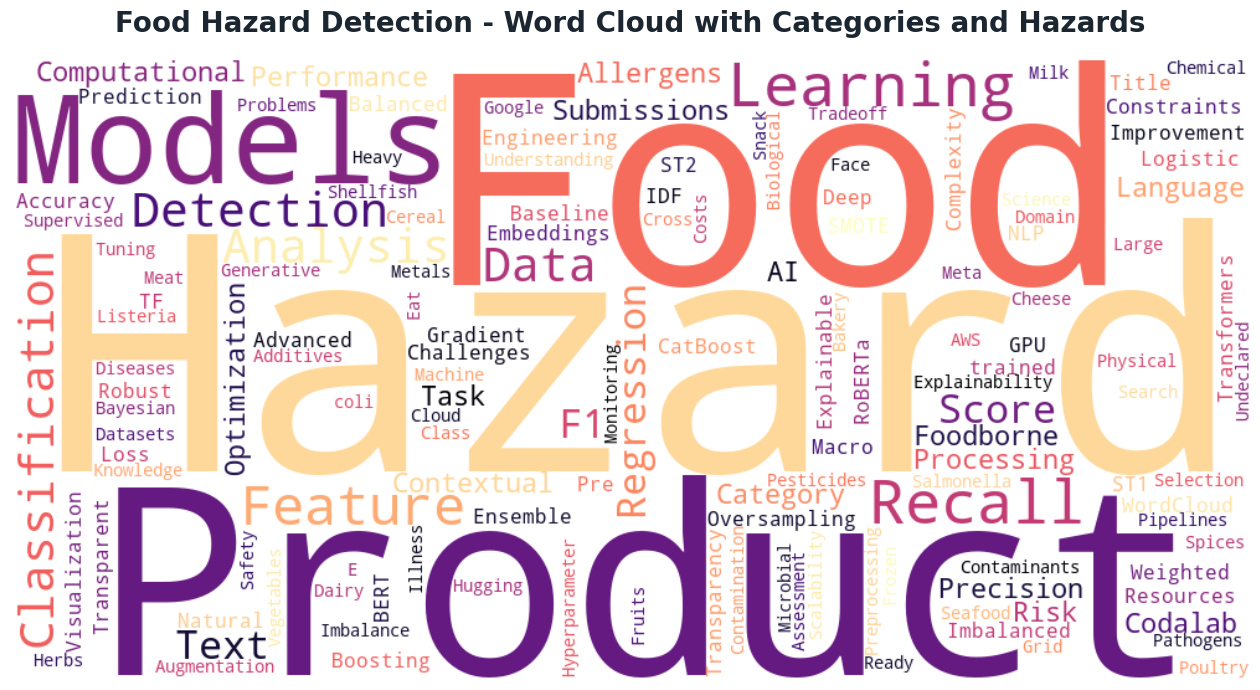

In [ ]:
# Text data for the word cloud, including food categories and hazard-related terms
text_with_food_hazards = """
Food Hazard Detection Logistic Regression CatBoost ST1 ST2 TF-IDF Text Features 
Title Features Hazard Product Classification Imbalanced Data F1 Score Gradient Boosting
Advanced Models Feature Engineering Ensemble Learning Pre-trained Models Deep Learning
GPU Resources Computational Constraints Oversampling SMOTE Weighted Loss Transformers
BERT RoBERTa Hazard-Category Product-Category Performance Improvement Baseline Analysis
Visualization WordCloud Task Complexity Prediction Submissions Optimization Accuracy
Recall Precision Contextual Embeddings Natural Language Processing NLP Robust Models
Macro F1 Scores Balanced Performance Codalab Submissions Recall Challenges Transparent AI
Explainable AI Transparency Explainability Codalab Data Class Imbalance Augmentation Pipelines
Hyperparameter Tuning Grid Search Bayesian Optimization Google Cloud AWS Hugging Face
Data Processing Scalability Contextual Understanding Language Models Large Datasets Preprocessing
Recall-Precision Tradeoff Computational Costs Generative Models Text Classification Feature Selection
Risk Analysis Food Science Recall and Detection Meta Learning Hazard Analysis Machine Learning
Supervised Learning Classification Tasks Regression Problems Domain Knowledge
Salmonella E. coli Listeria Pathogens Microbial Hazards Chemical Hazards Heavy Metals Allergens
Foodborne Illness Dairy Products Meat Products Fruits Vegetables Bakery Products Cereal Products
Seafood Shellfish Poultry Milk Cheese Frozen Foods Ready-to-Eat Foods Snack Foods Spices Herbs
Food Recalls Contaminants Additives Pesticides Biological Hazards Physical Hazards Undeclared Allergens
Cross-Contamination Food Safety Risk Assessment Foodborne Diseases Monitoring and Detection
"""

# Generate the word cloud
wordcloud_food_hazards = WordCloud(
    width=1000, height=500,
    background_color="white",
    colormap="magma",  # Use a vibrant color scheme
    max_words=200,
    contour_color="black",
    contour_width=3
).generate(text_with_food_hazards)

# Plot the word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud_food_hazards, interpolation="bilinear")
plt.axis("off")
plt.title("Food Hazard Detection - Word Cloud with Categories and Hazards", 
          fontsize=20, weight="bold", pad=20, color="#1B2631")
plt.tight_layout()

# Save the word cloud as an image
plt.savefig("food_hazard_wordcloud.png", format="png")
plt.show()
